<a href="https://colab.research.google.com/github/OMONa-E/Prediction-of-Product-Sales/blob/main/Omona_Emmanuel_Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Omona Emmanuel

## Project Overview
#### The main objectives of the project are:

- `Data Loading and Inspection:` The dataset is loaded and inspected to understand its structure and contents. This step involves checking for duplicates, missing values, and inconsistencies in the data.

- `Data Cleaning:` Duplicates are removed, missing values are handled by either filling them with appropriate placeholders or imputing them, and inconsistencies in categorical features are addressed to ensure data quality.

- `Exploratory Data Analysis (EDA):` Various visualizations such as histograms, boxplots, countplots, and heatmaps are utilized to explore the distribution, summary statistics, and correlations of numerical and categorical features in the dataset.

## Load and Inspect Data


In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd
import numpy as np
import missingno as msno

fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'

df_sales_pred = pd.read_csv(fpath)

df_sales_pred.info()
df_sales_pred.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [41]:
# Making a copy of our dataframe and saving it in a variable
df_sales_pred_1 = df_sales_pred.copy()

## Clean Data


In [42]:
# Knowing how many rows and columns in our dataframe (use .shape attribute)
num_row_col = df_sales_pred.shape

# This returns a tuple of row, column numbers
num_row_col

(8523, 12)

In [43]:
# Knowing the datatypes that make up our dataframe (use an attribute .dtypes)
data_types = df_sales_pred.dtypes

# returns a Series
data_types

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [44]:
# Inspecting for duplicates and dropping them
duplicates_row = df_sales_pred.duplicated(keep=False)

duplicates_row.sum()

# df_sales_pred[duplicates_row]

0

In [45]:
# testing for percentage uniqueness
df_sales_pred.nunique() / len(df_sales_pred) * 100

Item_Identifier              18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

In [46]:
# Filtering for Item_Identifier duplicates occurence
duplicates_item_identifier = df_sales_pred.duplicated(subset=['Item_Identifier'], keep=False)

duplicates_item_identifier.sum()

8514

In [47]:
# Displaying duplicate occurence
df_sales_pred[duplicates_item_identifier].sort_values('Item_Identifier')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
7467,DRA12,11.60,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924
1693,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
8043,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
...,...,...,...,...,...,...,...,...,...,...,...,...
2839,NCZ54,14.65,Low Fat,0.083359,Household,161.9552,OUT046,1997,Small,Tier 1,Supermarket Type1,4711.2008
1969,NCZ54,14.65,Low Fat,0.083528,Household,162.4552,OUT045,2002,NaN,Tier 2,Supermarket Type1,2274.3728
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,NaN,Tier 3,Grocery Store,324.9104
1896,NCZ54,NaN,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768


In [48]:
# Diplaying duplicates occurence
df_sales_pred[duplicates_item_identifier].sort_values('Outlet_Identifier')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2966,FDY60,10.500,Regular,0.044140,Baking Goods,143.9128,OUT010,1998,NaN,Tier 3,Grocery Store,143.8128
4257,FDR07,21.350,Low Fat,0.130127,Fruits and Vegetables,96.2094,OUT010,1998,NaN,Tier 3,Grocery Store,190.4188
4265,FDS40,15.350,Low Fat,0.023466,Frozen Foods,35.2190,OUT010,1998,NaN,Tier 3,Grocery Store,36.6190
6044,NCM06,7.475,Low Fat,0.126753,Household,154.2656,OUT010,1998,NaN,Tier 3,Grocery Store,308.9312
1951,FDA03,18.500,Regular,0.076097,Dairy,145.8102,OUT010,1998,NaN,Tier 3,Grocery Store,291.6204
...,...,...,...,...,...,...,...,...,...,...,...,...
3939,FDO13,7.865,Low Fat,0.061155,Breakfast,165.3526,OUT049,1999,Medium,Tier 1,Supermarket Type1,1151.1682
3942,FDX11,16.000,Regular,0.106918,Baking Goods,183.5634,OUT049,1999,Medium,Tier 1,Supermarket Type1,4725.8484
3943,NCW41,18.000,Low Fat,0.000000,Health and Hygiene,158.0604,OUT049,1999,Medium,Tier 1,Supermarket Type1,3327.6684
7546,FDO52,11.600,Regular,0.077285,Frozen Foods,172.4106,OUT049,1999,Medium,Tier 1,Supermarket Type1,4277.7650


In [49]:
# Identifying missing values
df_sales_pred.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<Axes: >

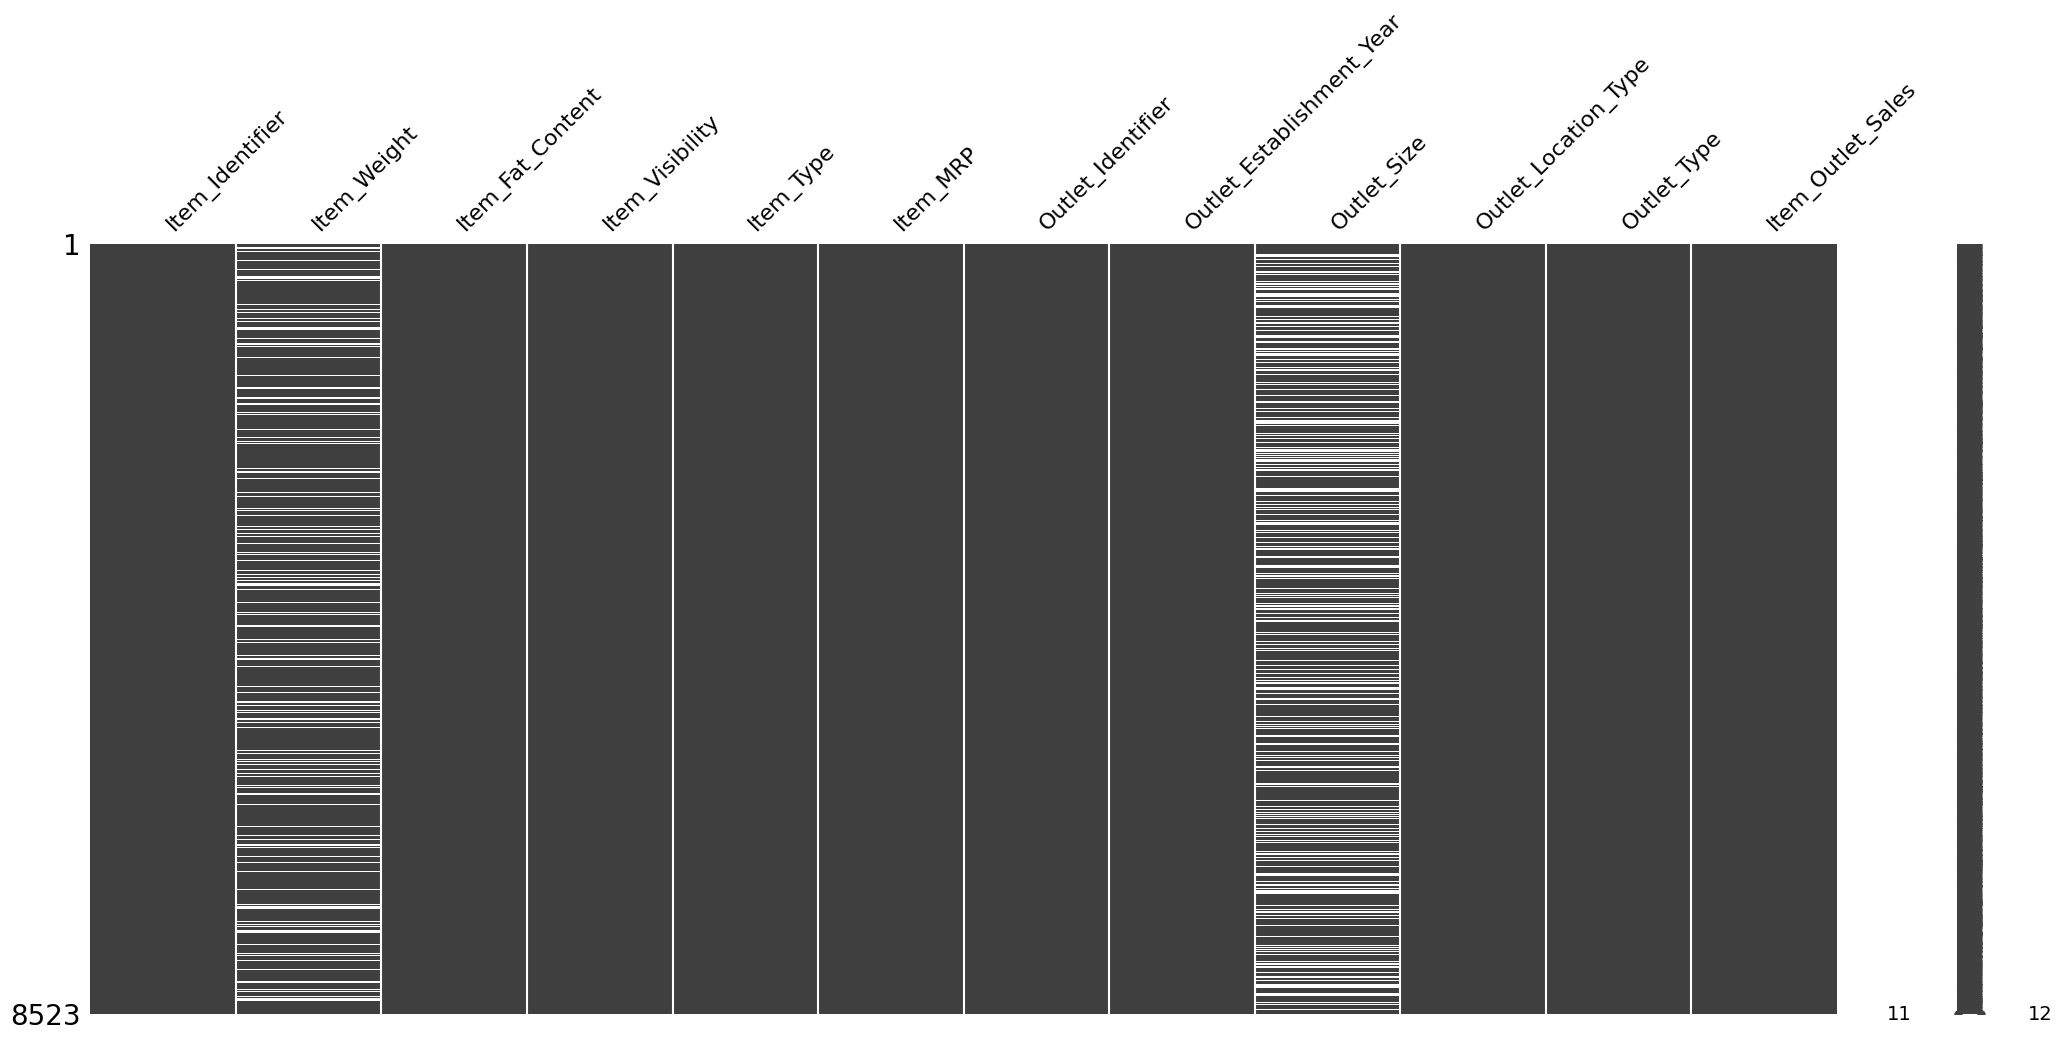

In [50]:
#  Visualing missing data in matrix
msno.matrix(df_sales_pred)

In [51]:
# Sorting out string/object features
obj_sales_col = df_sales_pred.select_dtypes('object').columns

df_sales_pred[obj_sales_col].isna().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [52]:
# Visualizing using dataframe slicing
df_sales_pred[['Outlet_Size']]

# Visualizing using .value_counts() method
df_sales_pred['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [53]:
# Filling up for the missing values
df_sales_pred['Outlet_Size'].fillna('MISSING', inplace=True)

# Visualizing and confirming if filled up
df_sales_pred['Outlet_Size'].value_counts(dropna=False)

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [54]:
# Addressing missing values usings a placeholder value
# Sorting out number features
num_sales_col = df_sales_pred.select_dtypes('number').columns

df_sales_pred[num_sales_col].isna().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

In [55]:
# Visualizing missing values with .value_counts() method
df_sales_pred['Item_Weight'].value_counts(dropna=False)

NaN       1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 416, dtype: int64

In [56]:
# describing the Item_Weight
df_sales_pred['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [57]:
# Filling the missing value with 999
# since max weight is 21.350
df_sales_pred['Item_Weight'].fillna(999, inplace=True)

# Visualizing using .value_counts() method
df_sales_pred['Item_Weight'].value_counts(dropna=True)

999.000    1463
12.150       86
17.600       82
13.650       77
11.800       76
           ... 
7.275         2
7.685         1
9.420         1
6.520         1
5.400         1
Name: Item_Weight, Length: 416, dtype: int64

<Axes: >

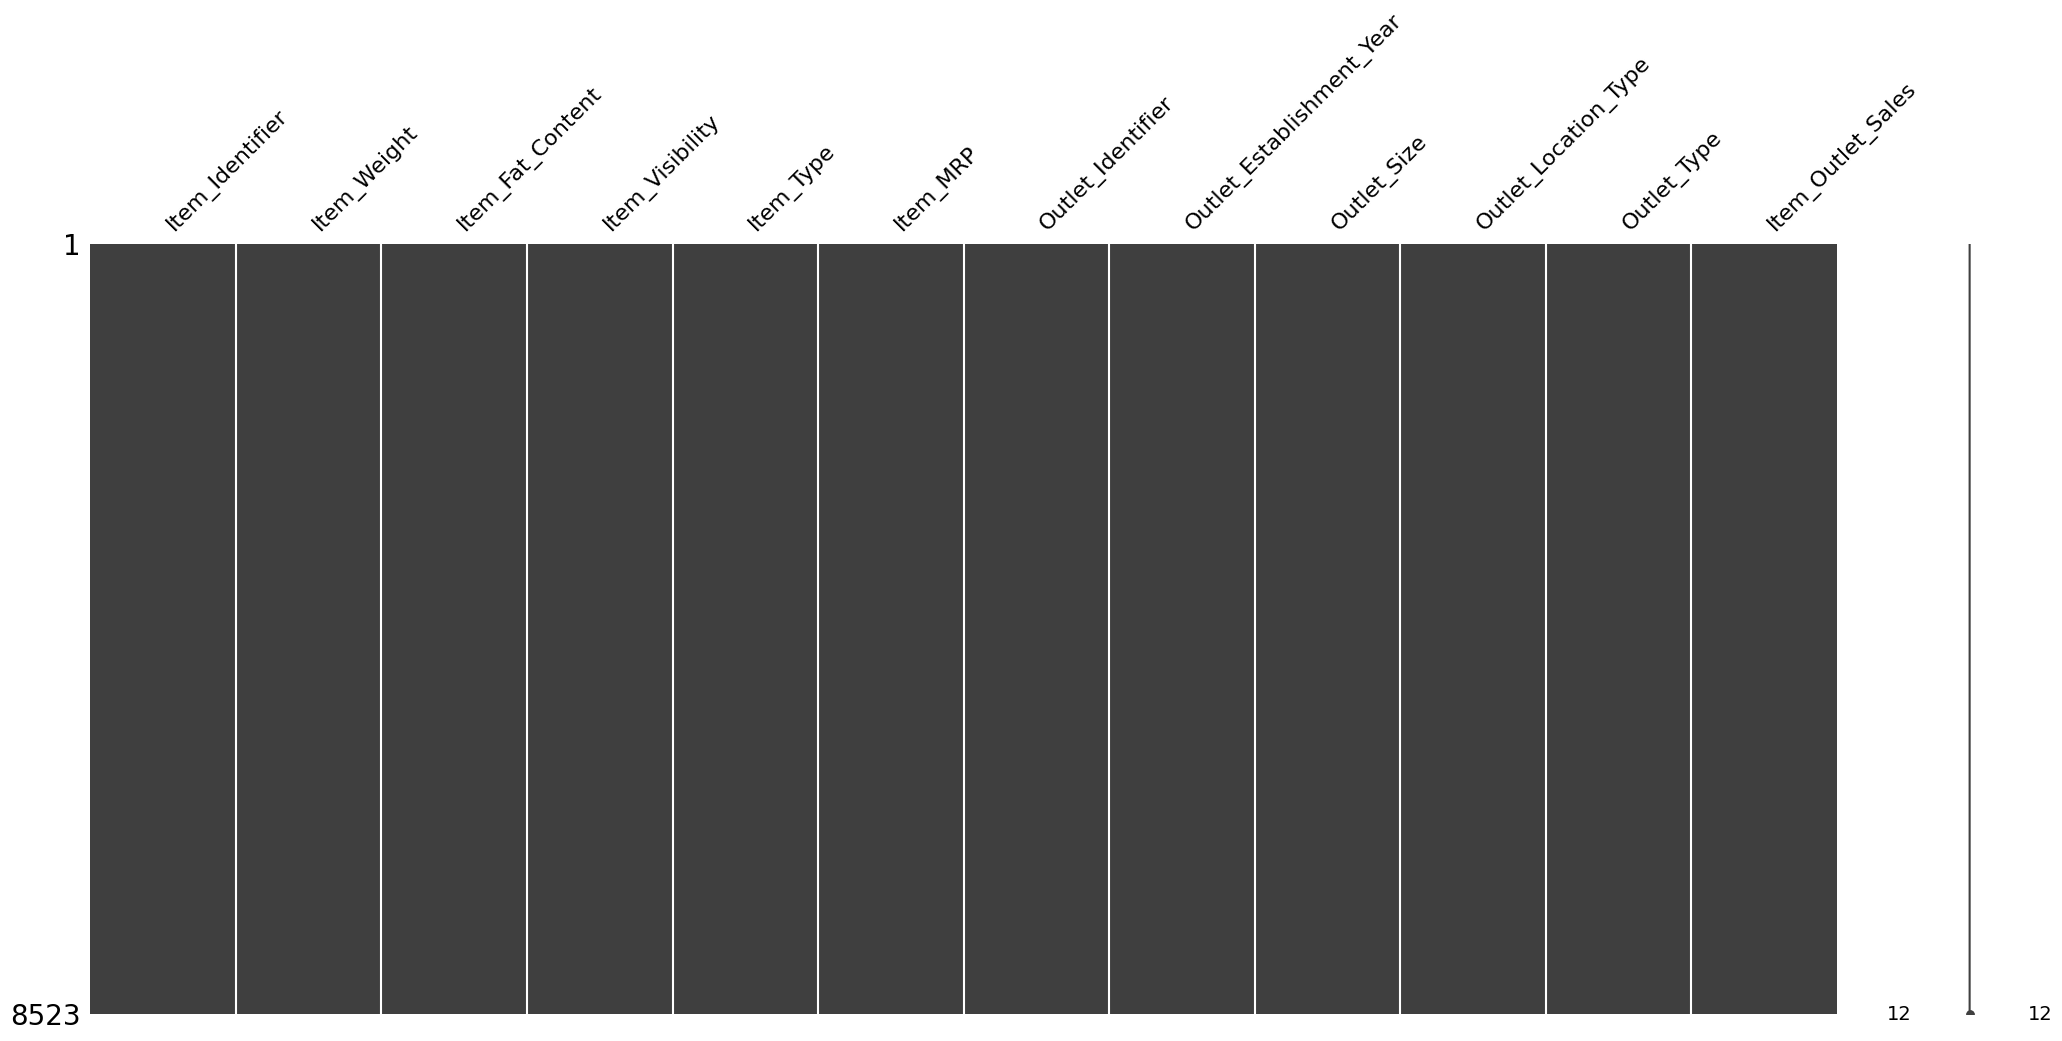

In [58]:
# Confirming for no missing values after address
msno.matrix(df_sales_pred)

In [59]:
# Quering for records inconsistency and fixing them for categorical features
# using characters
for item in obj_sales_col:
  print(f'{item} column')
  print(f"{df_sales_pred[item].value_counts()}")
  print('\n')

Item_Identifier column
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Item_Fat_Content column
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Item_Type column
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Outlet_Identifier column
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    92

In [60]:
# Working on inconsistency column
df_sales_pred['Item_Fat_Content'].value_counts(dropna=False)

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [61]:
# Replacing the inconsistency
df_sales_pred['Item_Fat_Content'].replace({
    "LF" : 'Low Fat',
    "reg" : 'Regular',
    "low fat" : 'Low Fat'
}, inplace=True)

# Visualizing inconsistency
df_sales_pred['Item_Fat_Content'].value_counts(dropna=True)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [62]:
# Visualizing central tendency for numerical features
# i.e min, max, mean, mode, ..etc values
for item in num_sales_col:
  print(f"{item} Feature/Column/Series Central tendency")
  print(f'{df_sales_pred[item].describe()}')
  print('\n')

Item_Weight Feature/Column/Series Central tendency
count    8523.000000
mean      182.132110
std       371.899127
min         4.555000
25%         9.310000
50%        14.500000
75%        19.500000
max       999.000000
Name: Item_Weight, dtype: float64


Item_Visibility Feature/Column/Series Central tendency
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


Item_MRP Feature/Column/Series Central tendency
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


Outlet_Establishment_Year Feature/Column/Series Central tendency
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000


## Exploratory Data Analysis


In [ ]:
# importing visualization modules
import seaborn as sns
import matplotlib.pyplot as plt

#### Viszualizing our df_sale_pred dataframe

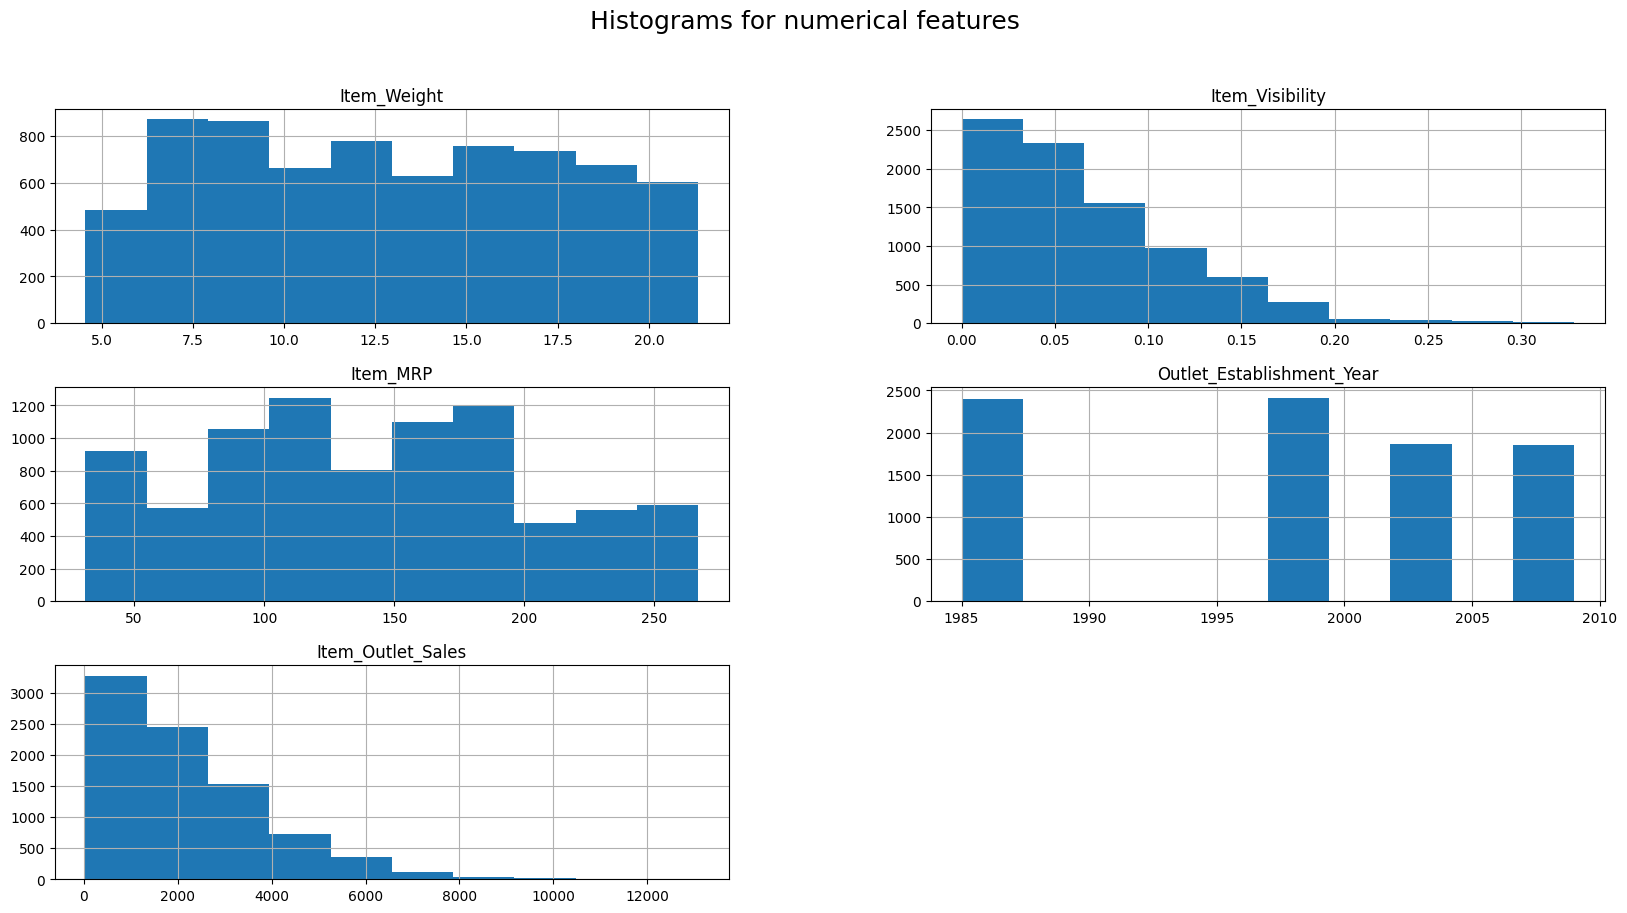

In [ ]:
# Histograms to view the distributions of numerical features in your dataset.
numerical_features = df_sales_pred.select_dtypes('number').columns

df_sales_pred[numerical_features].hist(bins=10, figsize=(20, 10))
plt.suptitle('Histograms for numerical features', fontsize=18)
plt.show();

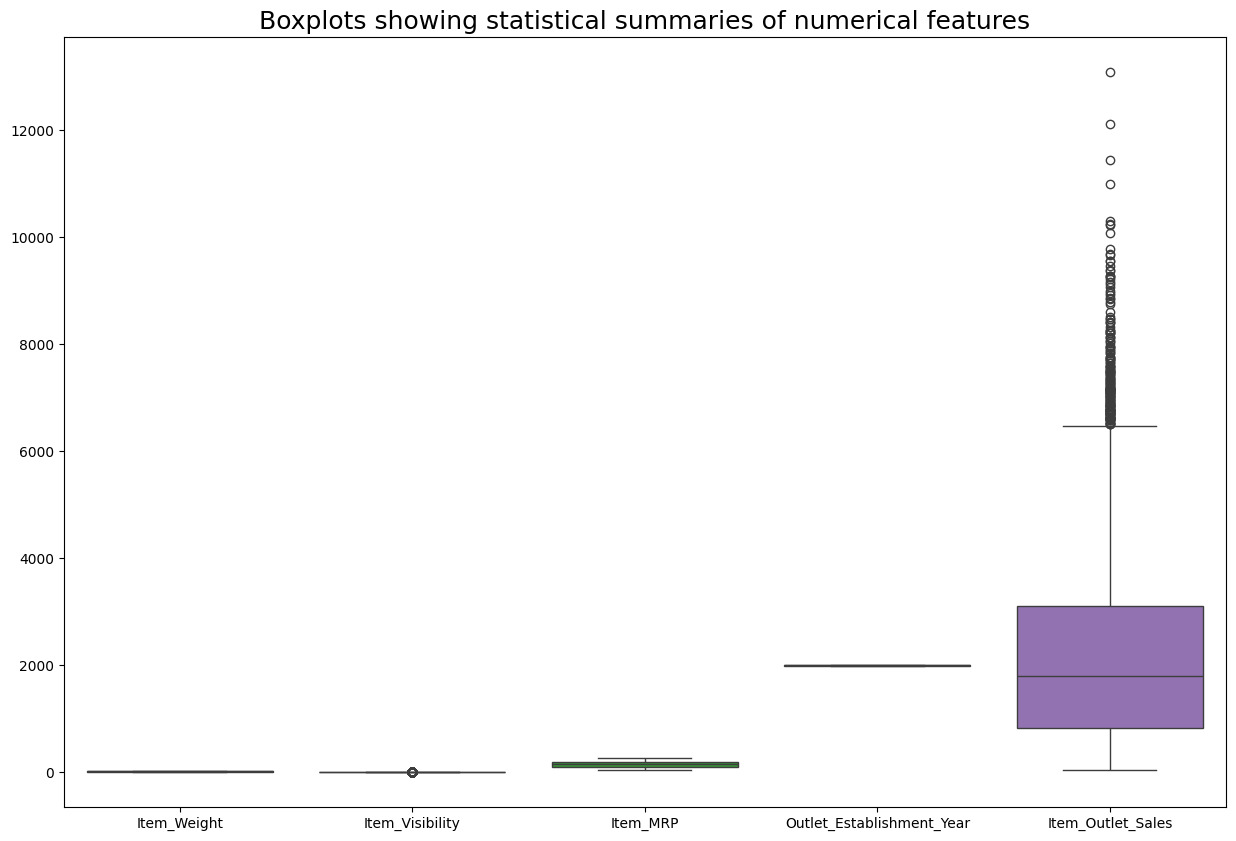

In [ ]:
# Boxplots to view statistical summaries of numerical features in your dataset.
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_sales_pred[numerical_features])
plt.title('Boxplots showing statistical summaries of numerical features', fontsize=18)
plt.show();

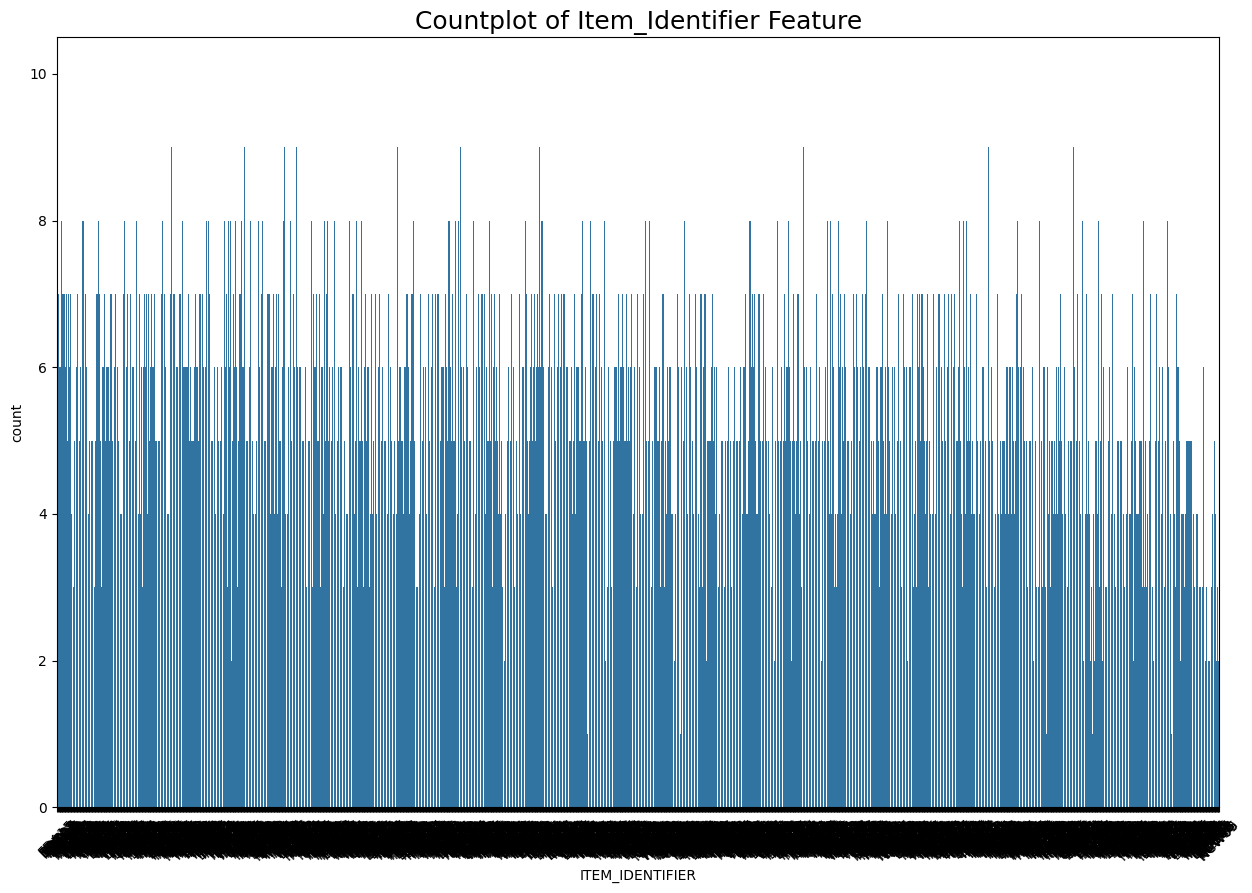

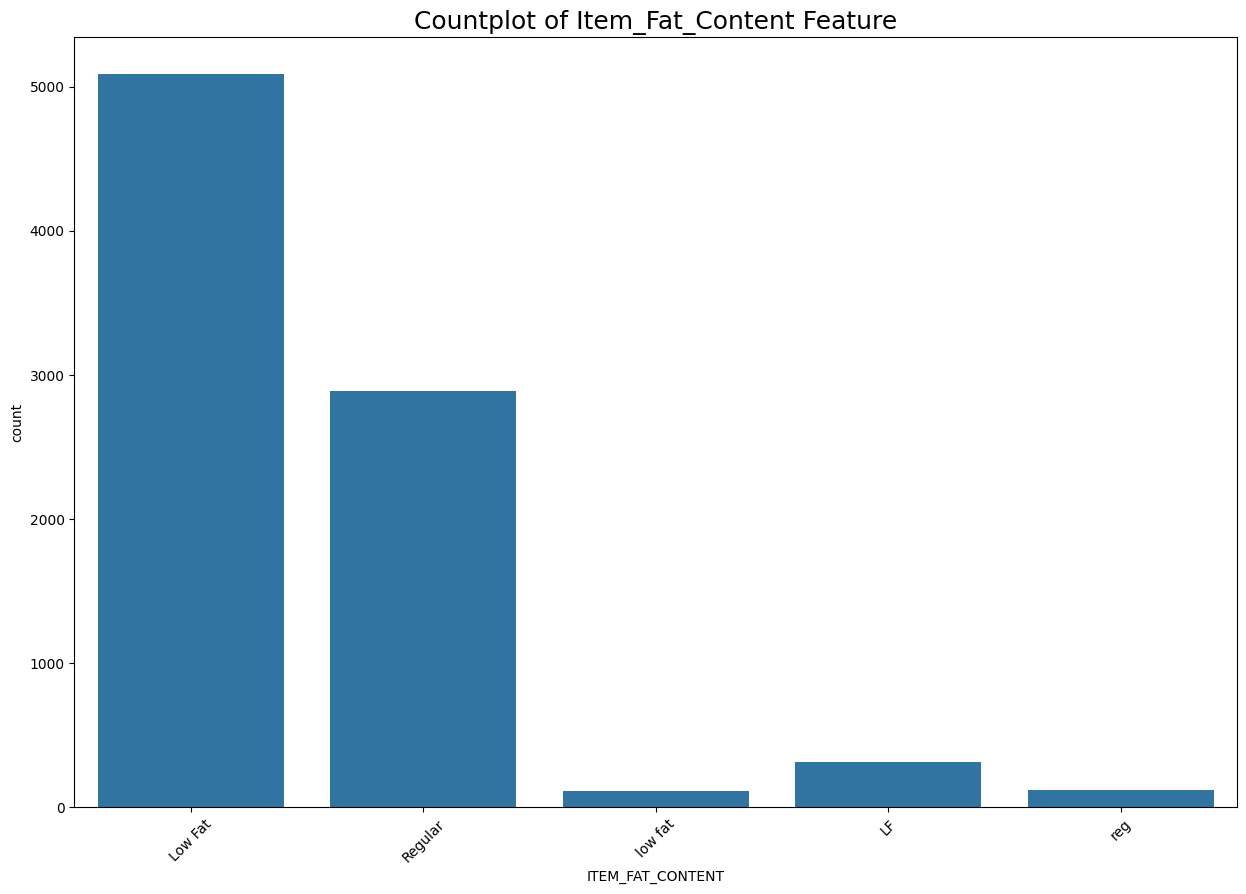

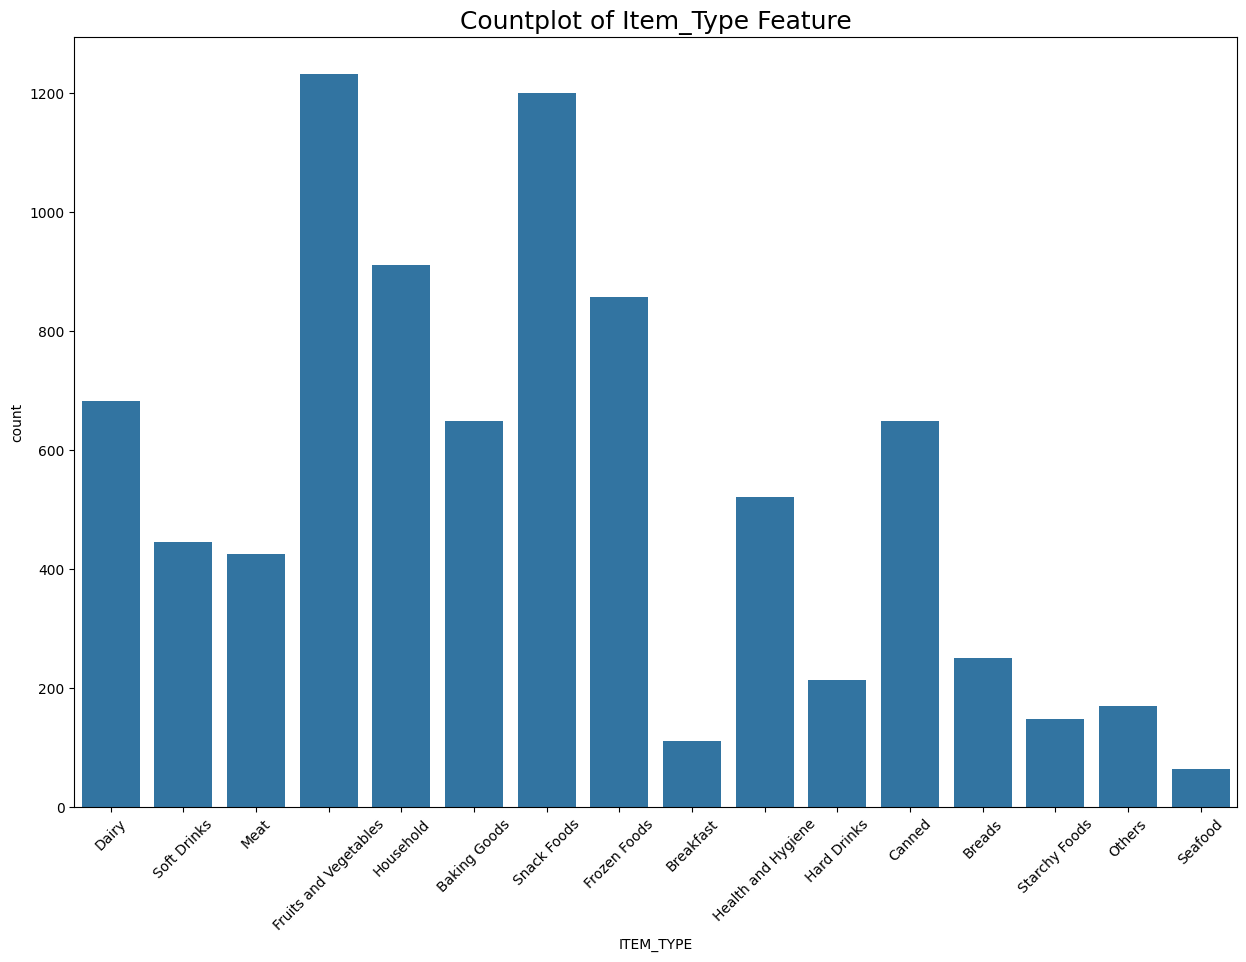

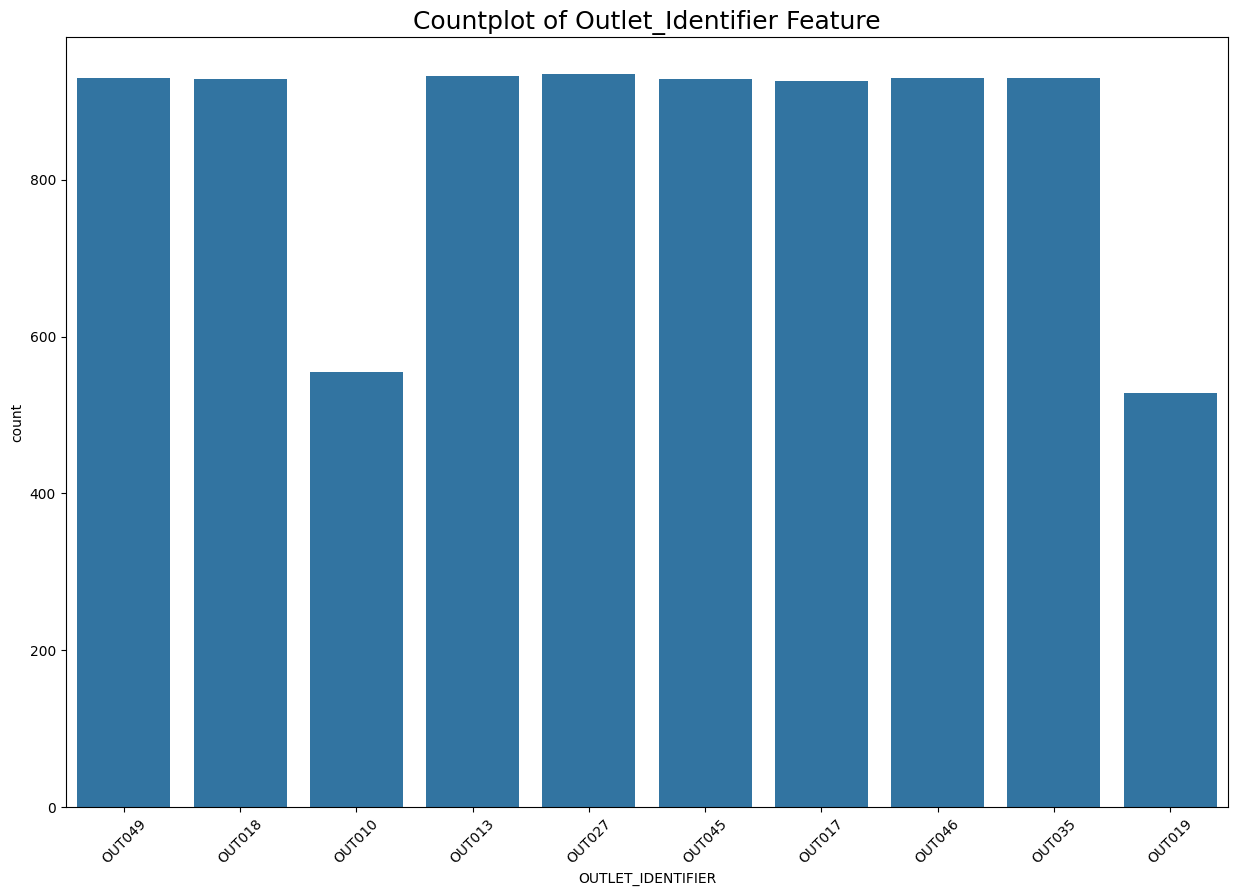

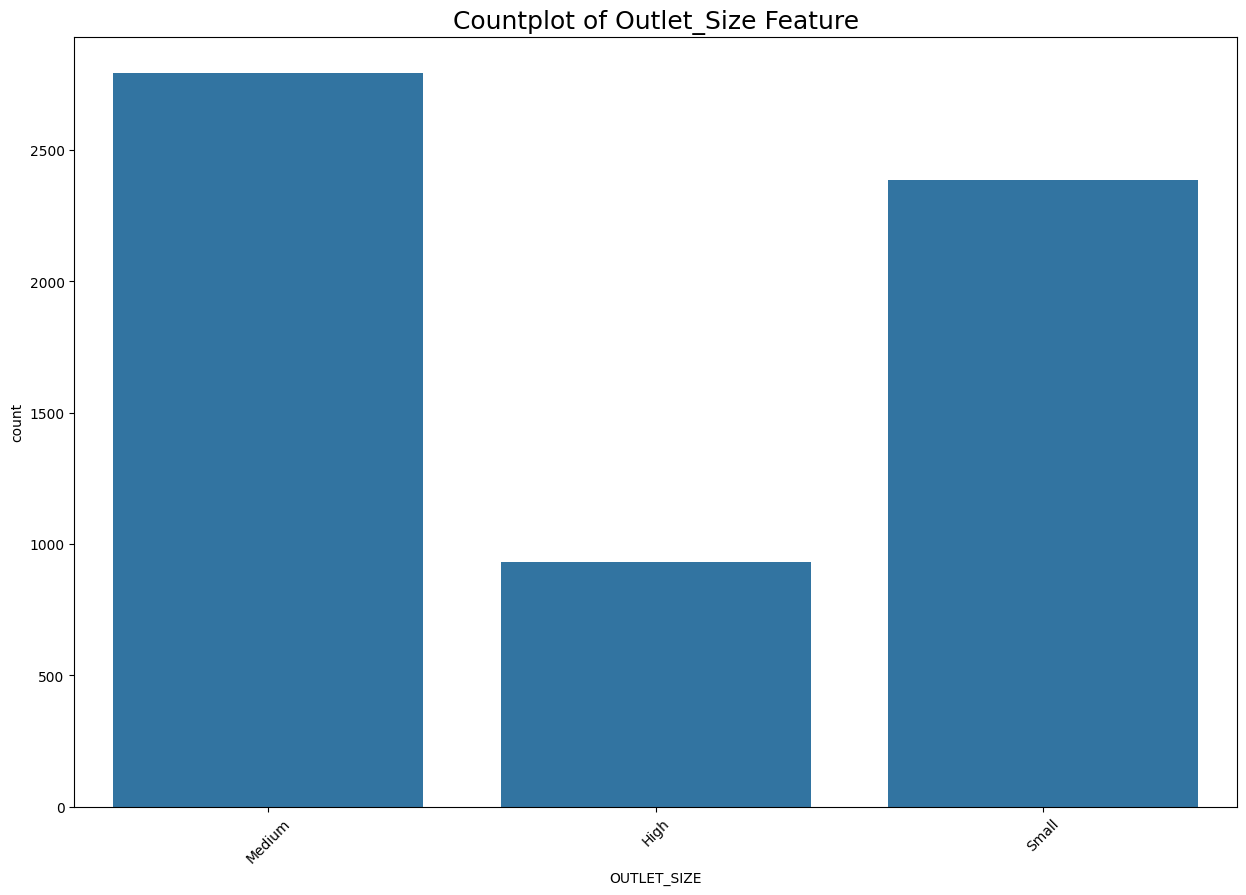

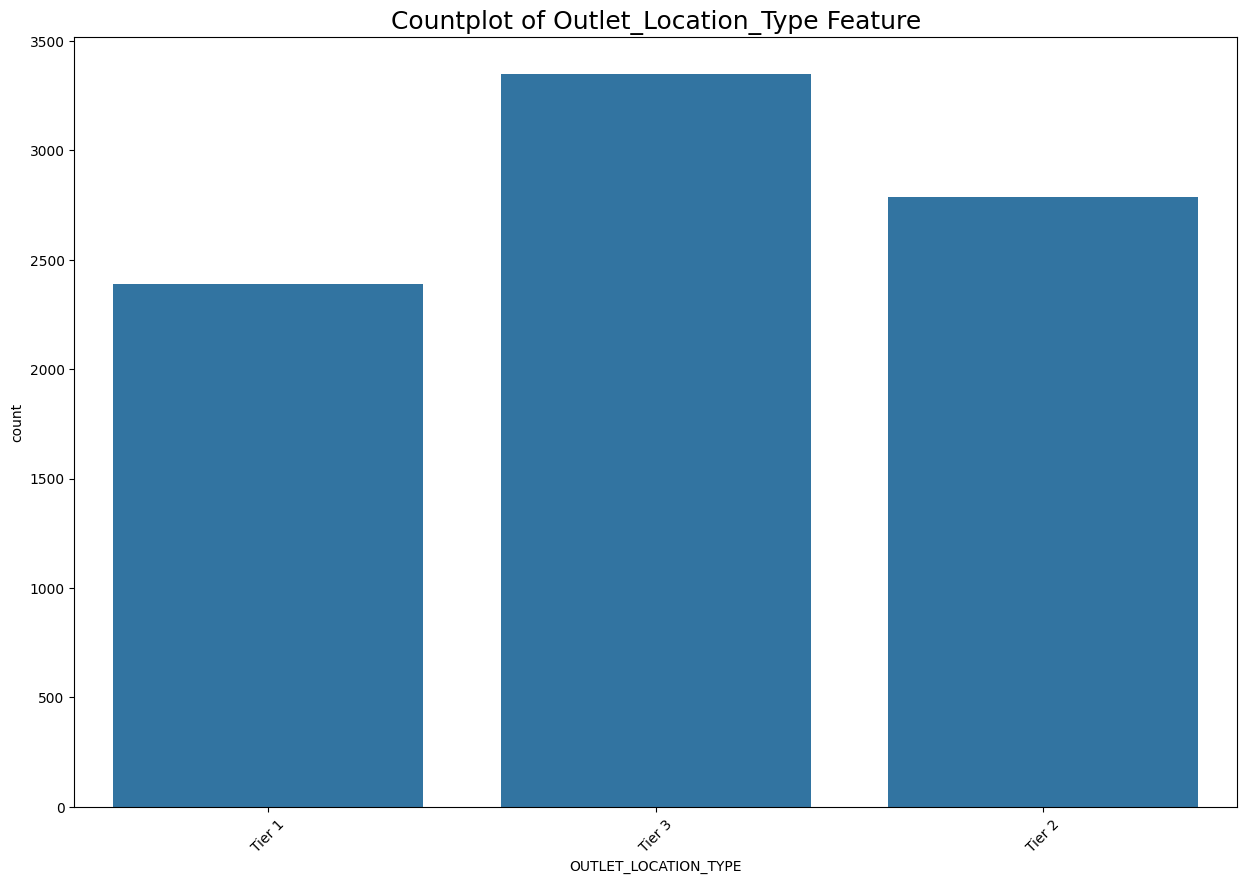

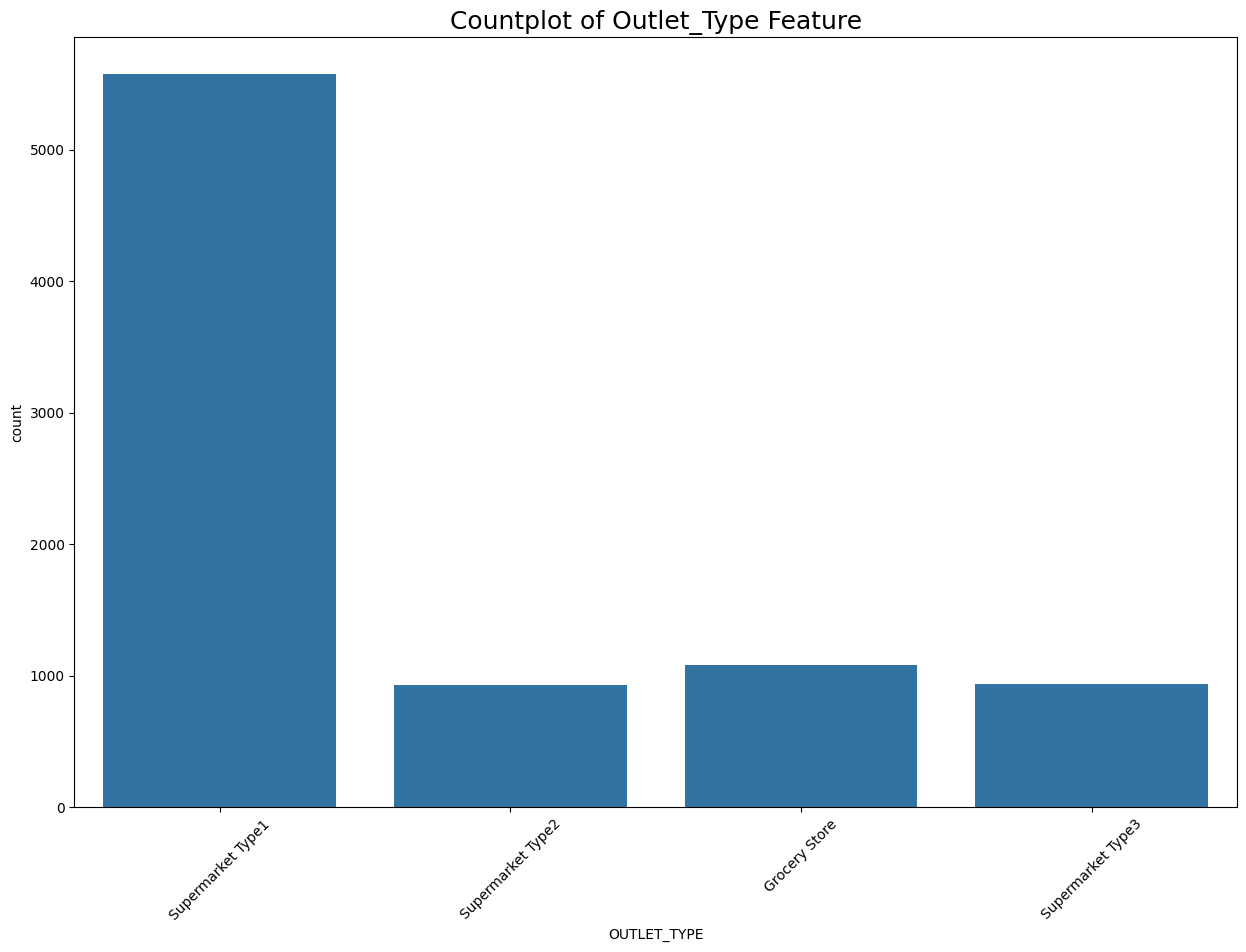

In [ ]:
# Countplots to view the frequency of each class of categorial features in your dataset.
categorical_features = df_sales_pred.select_dtypes('object').columns

def count_plot(cate):
  plt.figure(figsize=(15, 10))
  plt.title(f'Countplot of {cate} Feature', fontsize=18)
  sns.countplot(data=df_sales_pred, x=cate)
  plt.xticks(rotation=45)
  plt.xlabel(item.upper())
  plt.show();

for item in categorical_features:
  count_plot(item)
  print('\n')

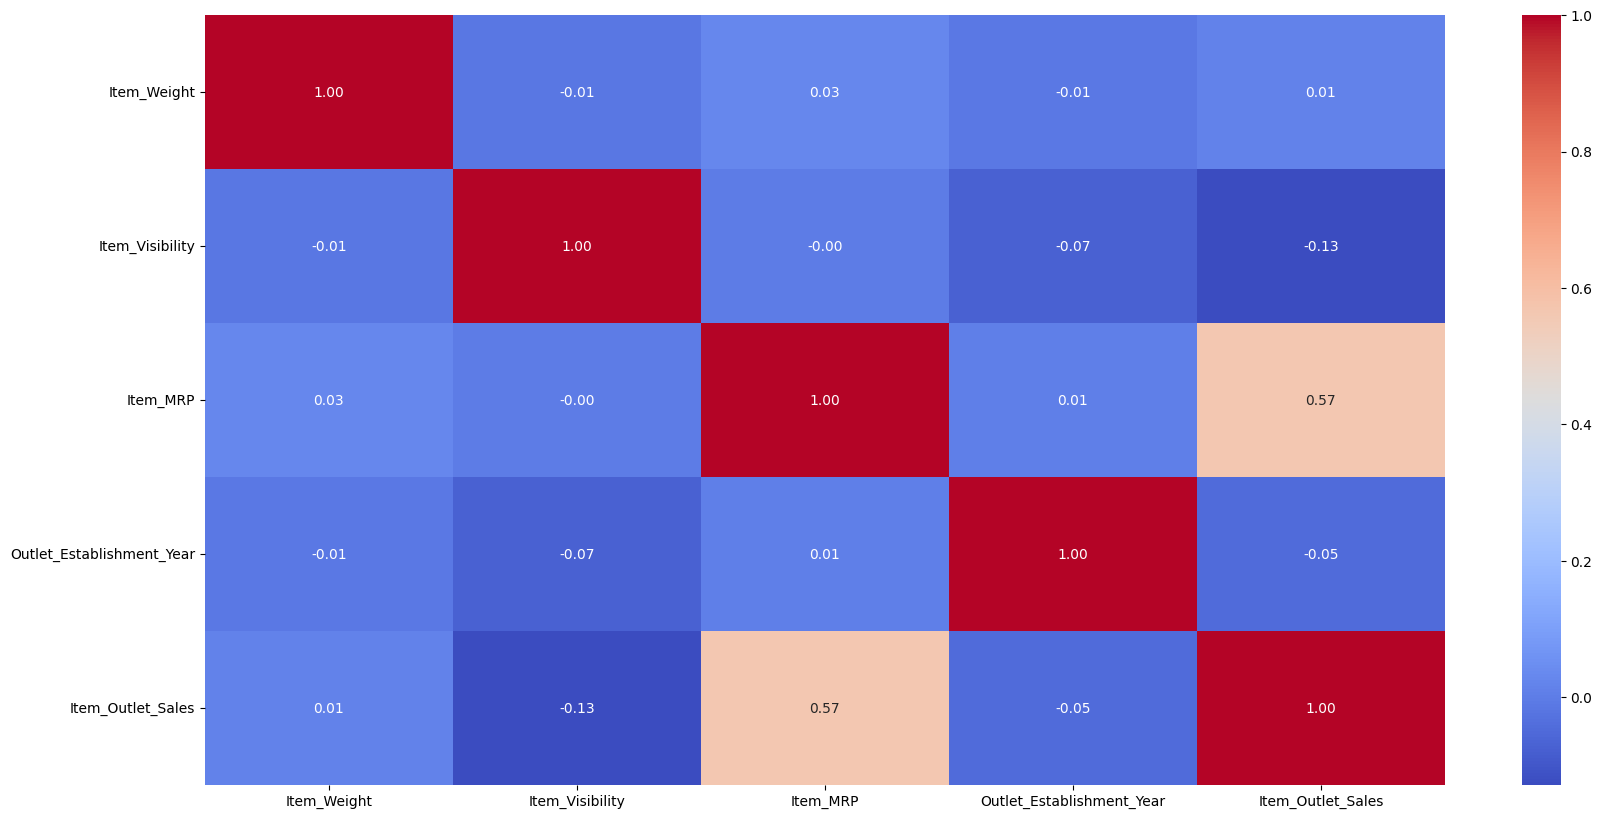

In [ ]:
# Heatmap to view the correlation between features
plt.figure(figsize=(20, 10))
corr = df_sales_pred.corr(numeric_only=True)
sns.heatmap(data=corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show();

## Feature Inspection

##### Adding Code Snippet for Feature EDA

In [84]:
# Basic imports for functions
import matplotlib.pyplot as plt
import seaborn as sns

# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING', figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{https://login.codingdojo.com/m/687/13765/117607}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticks(range(len(ax.get_xticks())))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show();

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5)):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{https://login.codingdojo.com/m/687/13765/117607}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize, sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show();


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [86]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='charges',figsize=(6,4), fillna = True, placeholder = 'MISSING', order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{https://login.codingdojo.com/m/687/13765/117607}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6, linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax, order=order, hue_order=order, legend=False, edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticks(range(len(ax.get_xticks())))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout();
  return fig, ax


def plot_numeric_vs_target(df, x, y='charges', figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{https://login.codingdojo.com/m/687/13765/117607}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show();

  return fig, ax


### Target Feature: Item_Outlet_Sales

- Category defintions:
    * Sales of the product in the particular store. This is the target variable to be predicted.

In [71]:
# Removing placeholders and replacing it with null values

# Item_Weight Feature
df_sales_pred['Item_Weight'].replace(999, np.nan, inplace=True)

# Outlet_Size Feature
df_sales_pred['Outlet_Size'].replace('MISSING', np.nan, inplace=True)


In [87]:
# Selecting Outlet_Size Feature

# Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
df_sales_pred[feature].dtype

dtype('O')

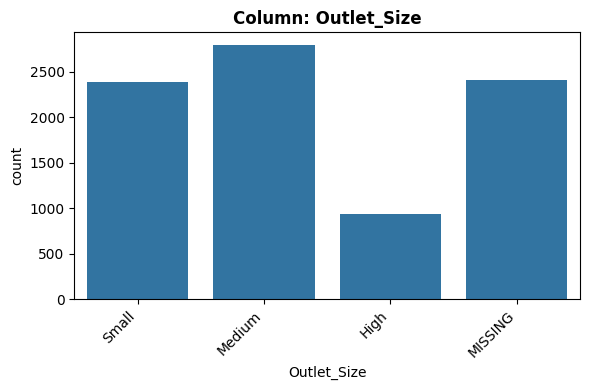

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Size'}, xlabel='Outlet_Size', ylabel='count'>)

In [85]:
# running the appropriate explore function (based on feature's dtype)
explore_categorical(df_sales_pred, x=feature, figsize = (6,4), order = ['Small', 'Medium', 'High', 'MISSING'])


**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - `Categorical (ordinal)`
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - `2410 at 28.28%, imputed with MISSING`

3. Is the feature constant or quasi-constant?
  - `No it is not`

4. What is the cardinality? Is it high?
  - `Four and it is moderate`

5. Would we know this BEFORE the target is determined?
  - `It would have taken a lot of effort (Time).. probably we would not know`

6. Is there a business case/understanding reason to exclude based on our business case?
  - `I think the missing/nan values`

___

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Size vs. Item_Outlet_Sales'}, xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>)

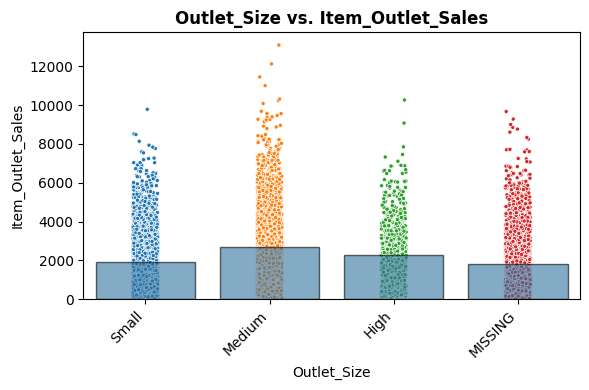

In [88]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df=df_sales_pred, x=feature, y='Item_Outlet_Sales',figsize=(6,4), order = ['Small', 'Medium', 'High', 'MISSING'])

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Yes`
  - Does this feature appear to be a predictor of the target?
    - `Yes`
___